


 a. Use a difference-in-differences regression model to estimate the impact of P900 on 1988-1990 and 1988-1992 test score gains – i.e., regress dx90 and dx92 on p90. What do the estimates imply about the size of the effect of the P900 program?



 dx90 

                            OLS Regression Results                            
Dep. Variable:                   dx90   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 05 Apr 2016   Prob (F-statistic):           1.03e-09
Time:                        12:10:30   Log-Likelihood:                -2198.9
No. Observations:                 651   AIC:                             4402.
Df Residuals:                     649   BIC:                             4411.
Df Model:                           1                                         
                 coef    std er

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


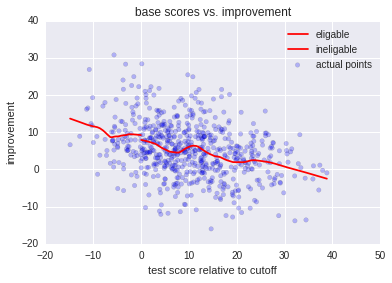



 Answer: Using dx90, it looks like the effect of the program is around 2 points. Using dx92, the effect looks even stronger, more like 4 points, though there's a rather unconvincing upward bend around the threshhold. Sample sizes below the threshhold are smaller, making potential noise more of an issue.




 dx92 




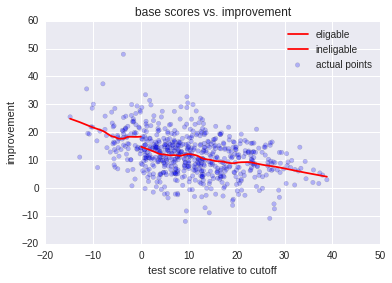



 g. Estimate the “first-stage” relationship between ivrule2_area2 and p90, and the “reduced-form” relationship between ivrule2_area2 and dx90 and dx92, using the following three specifications: 1) no control variables; 2) controlling for a cubic in the 1988 score; and 3) controlling for a cubic in the 1988 score, a quadratic in the number of test takers in 1988, and the interaction of the 1988 score with 1988 school size. Interpret your findings.




 first stage 


                            OLS Regression Results                            
Dep. Variable:                    p90   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     3157.
Date:                Tue, 05 Apr 2016   Prob (F-statistic):          1.14e-251
Time:                        12:10:31   Log-Likelihood:                 310.47
No. Observations:                 651   AIC:         

In [4]:
# %load RudyGilman_PS3.py
#!/usr/bin/env python

#########################################
# Applied Econometrics, PS3             #
# Rudy Gilman                           #
# March 30, 2016                        #
#########################################

import pandas as pd
import numpy as np
from pandas import DataFrame
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os, copy
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
import seaborn as sns

path = "/home/rudebeans/Desktop/school_spring2016/applied_econometrics/"

#path = os.path.dirname(__file__)

df = pd.read_stata(path+"p900_area2.dta", convert_categoricals=False).dropna()
df['intercept'] = 1 # Adding constant

"""
Problem Set 3

This exercise examines the following research question: What is the impact of Chile’s 900 Schools Program (a.k.a., P900) on student achievement? For background on the program and the data source refer to the paper, “The Central Role of Noise in the Evaluation of Interventions that Use Test Scores to Rank Schools,” by Kenneth Chay, Patrick McEwan, and Miguel Urquiola, American Economic Review, September 2005, 1237-1258.

Please include a concise summary of your empirical results when appropriate. We will analyze the
following data set:

Data Source: p900_area2.dta
This STATA data extract is the same school-level data used in the referenced paper, but restricted to schools in regions 6, 7, and 8 in Chile.

Data Notes:
1. There are 658 school level observations.

2. The key variables are:

dx90, dx92 = 1988-1990 (1990 minus 1988) and 1988-1992 (1992 minus 1988) school-level change in average test scores (average of math and reading scores).

p90 = indicator equal to one if the school received the P900 program resources and equal to zero, otherwise.

x88 = average test score in the school in 1988.

ivrule2_area2 = indicator equal to one if school had an average 1988 score (x88) that made it eligible to receive the P900 program and equal to zero, otherwise.

rule2_area2 = 1988 average score minus the P900 eligibility cutoff in the region that the school is in.

3. The other relevant variables are:

ncas88, ncas90, ncas92 = the number of test takers in the school in 1988, 1990, and 1992.

ses90, ses92 = average “socioeconomic status” of students in the school in 1990 and 1992 – a higher number implies higher SES (unavailable for 1988).

dses = 1990-1992 change in average SES.

rgn88 = region of Chile that school is in (6, 7, 8).

Research Question: Did the P900 program raise school achievement in 1990 and 1992?
The outcomes of interest are the 1988-1990 and 1988-1992 test score gains at the school-level. We want to estimate the “causal” effect of P900 on test score changes. Read the referenced paper for background and details on the P900 program, and sources of bias in conventional “difference-in-differences” evaluations of the program. In this exercise, we will use the regression discontinuity design implicit in the administration of the program to address potential issues of bias.
"""

print("\n\n\n a. Use a difference-in-differences regression model to estimate the impact of P900 on 1988-1990 and 1988-1992 test score gains – i.e., regress dx90 and dx92 on p90. What do the estimates imply about the size of the effect of the P900 program?\n\n")

X = df[['p90', 'intercept']]

lm = sm.OLS(df.dx90, X).fit()
print("\n dx90 \n")
print(lm.summary())

lm = sm.OLS(df.dx92, X).fit()
print("\n dx92 \n")
print(lm.summary())

print("\n This model makes it appear as if P900 program is very effective: Gains of the program are 5-7 points. \n")

print("\n\n b. Describe how the estimates in (a) may be biased by noise and mean reversion. Explain how mean reversion would affect the correlation between x88 and dx90 that would prevail even in the absence of the P900 program.  How is the bias dependent on the number of test takers in the school in 1988?\n\n")

print("\n Answer: Mean reversion: Observations will tend towards the mean, i.e., test scores farther from the mean one year will on average show a larger year-on-year difference as they revert back towards the mean. Schools eligable for the P900 program are far below the mean, therefore even in the absence of the program they would tend to experience a larger year-on-year increase in test scores. In this case, not accounting for mean reversion will bias our estimates of the returns of the program upwards. \n\n Noise: Schools with fewer students will experience larger yearly variance in their test scores (law of large numbers). In this case, estimates will be biased upwards as increased variance magnifies mean reversion effect. Bias decreases as number of test takes increases. \n") 


print("\n\n c. In principle, only schools who scored below a region-specific threshold in 1988 were eligible to receive the P900 program in 1990 through 1992 (i.e., ivrule2_area2 = 1). Thus, the indicator for receiving P900 should be a discrete function of a school’s average score in 1988. Describe how one could use this discontinuity in treatment assignment to derive an estimate of the program effects while controlling for the mean reversion bias. Under what conditions will these estimates be valid?\n\n")

X = df[['p90', 'intercept', 'x88']] 

lm = sm.OLS(df.dx90, X).fit()
print("\n dx90 \n")
print(lm.summary())

print("Answer: We can regress test score differences on p90 while controlling for mean reversion. We can do this by using original test scores as a control. In this case, we have to make sure our functional form is appropriate (ie in our simple linear regression w controls, we need to ensure that relationship is in fact linear and trend functions are identical on both sides of threshhold. Alternatively, we could limit our model to only those observations within a certain distance of the threshhold (even non-linear functions are locally linear). In this case, we must be aware than while observations become more similiar as we narrow the window, sample sizes decrease, as well. RD approach is valid when treatment is a deterministic and discontinuous function of a covariate, in this case test scores. \n Introducing x88 as a control drops our estimates from 5-7 to less than 2. \n")


print("\n\n d. In practice, the P900 program was assigned according to this rule imperfectly. However, over 97 percent of schools in regions 6-8 were “correctly” assigned implying a slippage of less than 3 percent. Using a nonparametric smoother (“lowess” in STATA), plot the “smoothed” relationship between the probability of receiving P900 (p90) and the school’s score in 1988 relative to the regional cutoff (rule2_area2), along with the actual data points. For this exercise, use the “running-mean” smoother and a bandwidth of 0.05. Describe your findings.\n\n")

print("\n\n Answer: Because of imperfect compliance, probability of treatment decreases nonlinearly at the P900 threshhold rather than constituting a perfect step function.\n\n")

lowess = sm.nonparametric.lowess
jitter = np.random.normal(0, .00001, len(df.p90))
df['p90j'] = df.p90 + jitter # bug in statsmodels, adding some jitter as workaround

lws = lowess(df.p90j, df.rule2_area2, frac = .25, it=0)
lwsX = [z[0] for z in lws]
lwsY = [z[1] for z in lws]
"""
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.rule2_area2, df.p90, c='blue')
ax.plot(lwsX, lwsY, c='red')
ax.set_title('p(treatment) and scores')  
ax.set_ylabel('p(treatment)')
ax.set_xlabel('test score relative to cutoff')
ax.legend(['predicted p(treatment)', 'actual points'])
plt.show()
fig.clf()
"""

print("\n\n e. Suppose that the P900 eligibility indicator (ivrule2_area2) is a potential instrumental variable for P900 program status. Under what assumptions will it be a valid instrument? Write down the structural, first-stage, and reduced-form equations for P900 status and 1988-1990 and 1988-1992 test score gains as a function of the eligibility instrument. How does two-stage least squares use these equations? Do you still need to control for potential mean reversion bias in the instrumental variables estimates?\n\n")


print("\n\n Answer: It's a valid IV if it is uncorrelated with test scores except through the avenue of actual treatment. It's strong if if there's a strong correlation between assignment and actual treatment. \n\n First-stage: Actual treatment is a function of assignment to treatment (+ constant + controls, assume this for following equations, as well). This measures compliance. \n\nStructural: Test score differences are a function of treatment. This is the relationship we really want to measure. \n\n Reduced form: Test score differences are a function of assignment to treatment. \n\n Second-stage: Test score differences are a function of treatment as predicted by assignment to treatment (estimated from first-stage). \n\n This approach takes treatment as predicted by assignment and swaps it for actual treatment in the structural equation, purging our estimates of bias introduced by selection effects. We still need to control for mean reversion bias. We could also run the model on only those observations within a certain distance of the threshhold.\n\n")

print("\n\nf. Using a nonparametric smoother, plot the smoothed relationship between dx90 and rule2_area2, separately for eligible and ineligible schools. Use a bandwidth of 0.3 for the eligible schools and 0.1 for the ineligible schools (and the running mean smoother). Describe what you find and what it implies about the impact of the P900 program on 1988-1990 test score gains. Now do the same analysis for dx92 and interpret your findings.\n\n")
    
def make_reg_mean(df, col):
    
    el = df[df.ivrule2_area2 == 1]
    inel = df[df.ivrule2_area2 == 0]

    lws = lowess(el[col], el.rule2_area2, frac = .75, it=0)
    lwsX = [z[0] for z in lws]
    lwsY = [z[1] for z in lws]

    lws0 = lowess(inel[col], inel.rule2_area2, frac = .25, it=0)
    lwsX0 = [z[0] for z in lws0]
    lwsY0 = [z[1] for z in lws0]

    # plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.rule2_area2, df[col], c='blue', alpha=0.25)
    ax.plot(lwsX, lwsY, c='red')
    ax.plot(lwsX0, lwsY0, c='red')
    ax.set_title('base scores vs. improvement')  
    ax.set_ylabel('improvement')
    ax.set_xlabel('test score relative to cutoff')
    ax.legend(['eligable', 'ineligable', 'actual points'])
    plt.show()
    fig.clf()

print("\n\n dx90 \n\n")
make_reg_mean(df, 'dx90')

print("\n\n Answer: Using dx90, it looks like the effect of the program is around 2 points. Using dx92, the effect looks even stronger, more like 4 points, though there's a rather unconvincing upward bend around the threshhold. Sample sizes below the threshhold are smaller, making potential noise more of an issue.\n\n")

print("\n\n dx92 \n\n")
make_reg_mean(df, 'dx92')


print("\n\n g. Estimate the “first-stage” relationship between ivrule2_area2 and p90, and the “reduced-form” relationship between ivrule2_area2 and dx90 and dx92, using the following three specifications: 1) no control variables; 2) controlling for a cubic in the 1988 score; and 3) controlling for a cubic in the 1988 score, a quadratic in the number of test takers in 1988, and the interaction of the 1988 score with 1988 school size. Interpret your findings.\n\n")

# higher order and interactive terms
df['x88_2'] = df.x88**2
df['x88_3'] = df.x88**3 
df['ncas88_2'] = df.ncas88**2
df['ncas88_3'] = df.ncas88**3
df['ncas88_4'] = df.ncas88**4
df['ncas88_x88'] = df.x88 * df.ncas88

print("\n\n first stage \n\n")
lmf = sm.OLS(df.p90, df.ivrule2_area2).fit()
print(lmf.summary())

def make_ols(df, col, var):

    print("\n\n reduced form #1 \n\n")
    lmr = sm.OLS(df[col], df[[var]]).fit()
    print(lmr.summary())

    # Not exactly following directions above
    print("\n\n reduced form #2 \n\n")
    lmr = sm.OLS(df[col], df[[var, 'x88','x88_2', 'x88_3']]).fit()
    print(lmr.summary())

    print("\n\n reduced form #3 \n\n")
    lmr = sm.OLS(df[col], df[[var, 'x88', 'x88_2','x88_3', 'ncas88', 'ncas88_2','ncas88_3','ncas88_4', 'ncas88_x88']]).fit()
    print(lmr.summary())
    
print("\n\n dx90 \n\n")
make_ols(df, 'dx90', 'ivrule2_area2')

print("\n\n dx92 \n\n")
make_ols(df, 'dx92', 'ivrule2_area2')



print("\n\n Now estimate the effects of P900 on 1988-1990 and 1988-1992 test score gains using two-stage least squares and the eligibility indicator as an instrument for the three specifications. Interpret the results.\n\n")

print("\n\n instrumenting \n\n")
p90_pred = lmf.predict()
df['p90_pred'] = p90_pred

print("\n\n dx90 \n\n")
make_ols(df, 'dx90', 'p90_pred')

print("\n\n dx92 \n\n")
make_ols(df, 'dx92', 'p90_pred')

print("\n\n Answer: Estimates for returns of the program fall as we introduce additional controls, decreasing to two pts in the most-controlled model. Estimated effect of schooling doubles when using dx92 data.\n\n")


print("\n\n h. Now provide a concise synthesis/summary of your results.  Discuss the evidence you found on the importance of mean reversion bias in conventional difference-in-differences estimates of the program effects, and the “credibility” of the regression discontinuity design in removing this potential bias.\n\n")


print("\n\n Answer: We found significant mean reversion bias in our conventional difference-in-differences estimate of the programs effects. An RD design was an appropriate way to remove the bias. When controlling for mean reversion, we saw our estimates of the effects of the program drop from 5-7 to 2-5 points (depending on year used). \n\n")

